In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
train = pickle.load(open('c_train.pickle', 'rb'))
b = pickle.load(open('c_b.pickle', 'rb'))
bb = pickle.load(open('c_bb.pickle', 'rb'))
ccb = pickle.load(open('c_cb.pickle', 'rb'))
ip = pickle.load(open('c_ip.pickle', 'rb'))
pcb = pickle.load(open('c_pcb.pickle', 'rb'))
pa = pickle.load(open('c_pa.pickle', 'rb'))

# Train

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [11]:
pd.set_option('display.max_rows', 120)
train.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False)

TARGET                          1.000000
EXT_SOURCE_2                    0.160303
EXT_SOURCE_3                    0.157397
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055217
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
DAYS_EMPLOYED                   0.044932
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
AMT_GOODS_PRICE                 0.039628
FLOORSMAX_MODE                  0.038377
REGION_POPULATION_RELATIVE      0.037227
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032394
DEF_60_CNT_SOCIAL_CIRCLE        0.031401
AMT_CREDIT                      0.030369
TOTALAREA_MODE                  0.029467
FLOORSMAX_AVG                   0.029145
FLOORSMAX_MEDI                  0.028989
FLAG_DOCUMENT_6 

In [12]:
train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,NaN,NaN,NaN,NaN,1.000000,0.770127,0.986588,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.770127,1.000000,0.774661,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,0.986588,0.774661,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


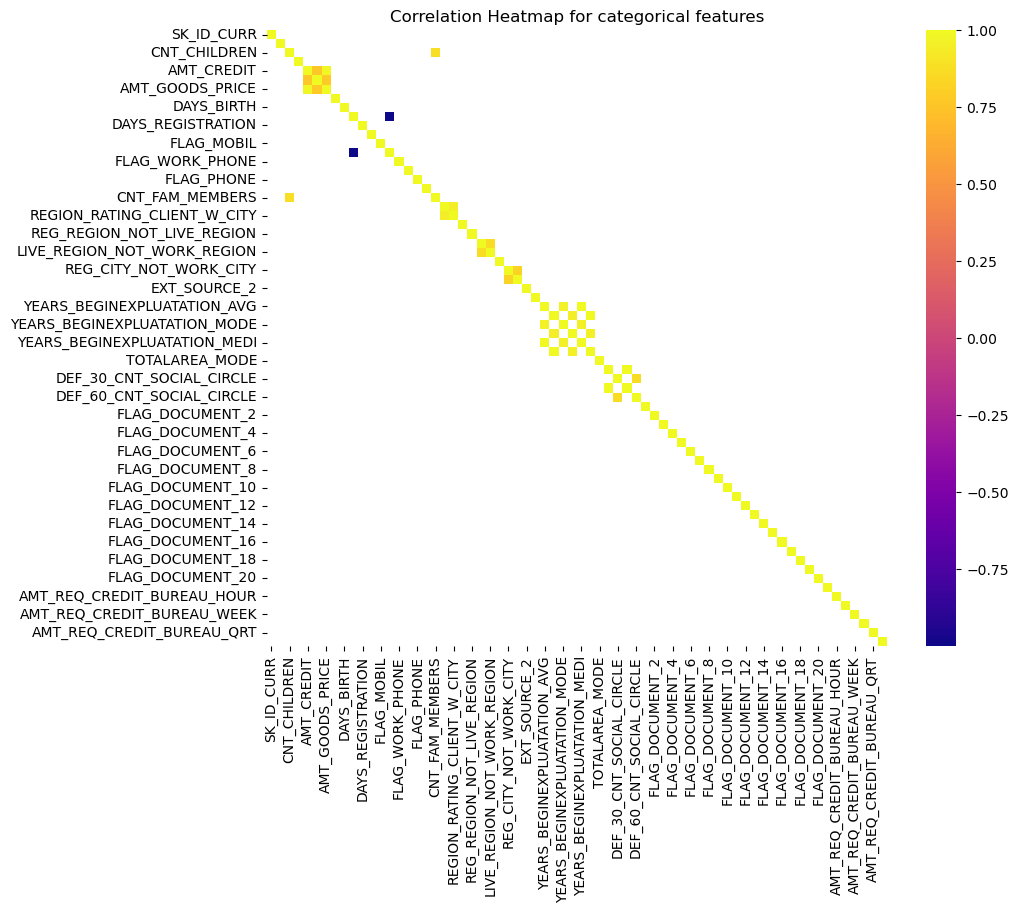

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap((train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]), cmap='plasma', annot=False, annot_kws={'size': 2, 'color':'black'})
plt.title('Correlation Heatmap for categorical features')
plt.show()

In [14]:
train = train[[
    'SK_ID_CURR',
    'TARGET',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY'
]]
train

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,100002,1,M,Y,Working,0.262949,0.139376,-9461,2,-1134.0,-2120,0
1,100003,0,F,N,State servant,0.622246,0.510853,-16765,1,-828.0,-291,0
2,100004,0,M,Y,Working,0.555912,0.729567,-19046,2,-815.0,-2531,0
3,100006,0,F,Y,Working,0.650442,0.510853,-19005,2,-617.0,-2437,0
4,100007,0,M,Y,Working,0.322738,0.510853,-19932,2,-1106.0,-3458,1
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,M,N,Working,0.681632,0.510853,-9327,1,-273.0,-1982,0
307507,456252,0,F,Y,Pensioner,0.115992,0.510853,-20775,2,0.0,-4090,0
307508,456253,0,F,Y,Working,0.535722,0.218859,-14966,3,-1909.0,-5150,1
307509,456254,1,F,Y,Commercial associate,0.514163,0.661024,-11961,2,-322.0,-931,1


### Credit Card Balance with Train

In [15]:
train = train.merge(ccb, how='left', on='SK_ID_CURR')

### POS Cash Balance with Train

In [16]:
train = train.merge(pcb, how='left', on='SK_ID_CURR')

### Bureau with Bureau Balance

In [17]:
# b = b.merge(bb, how='left', on='SK_ID_BUREAU')


### Bureau with Train

In [18]:
train = train.merge(b, how='left', on='SK_ID_CURR')

### Previous Application with Train

In [19]:
train = train.merge(pa, how='left', on='SK_ID_CURR')

## Encoding/Scaling

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8561442 entries, 0 to 8561441
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   CODE_GENDER                  object 
 3   FLAG_OWN_REALTY              object 
 4   NAME_INCOME_TYPE             object 
 5   EXT_SOURCE_2                 float64
 6   EXT_SOURCE_3                 float64
 7   DAYS_BIRTH                   int64  
 8   REGION_RATING_CLIENT_W_CITY  int64  
 9   DAYS_LAST_PHONE_CHANGE       float64
 10  DAYS_ID_PUBLISH              int64  
 11  REG_CITY_NOT_WORK_CITY       int64  
 12  AMT_BALANCE                  float64
 13  AMT_CREDIT_LIMIT_ACTUAL      float64
 14  AMT_RECEIVABLE_PRINCIPAL     float64
 15  AMT_RECIVABLE                float64
 16  AMT_TOTAL_RECEIVABLE         float64
 17  CNT_INSTALMENT_MATURE_CUM    float64
 18  NAME_CONTRACT_STATUS         object 
 19  

In [43]:
train['CNT_PAYMENT'].value_counts()

CNT_PAYMENT
12.000000    1788601
24.000000     754466
20.000000     333117
36.000000     299327
18.000000     298727
              ...   
32.437500         12
11.400000         11
5.500000          10
22.027397          6
1.000000           4
Name: count, Length: 781, dtype: int64

In [ ]:
ord_feats = train[[
    'FLAG_OWN_REALTY',
    'REGION_RATING_CLIENT_W_CITY',
    'AMT_CREDIT_LIMIT_ACTUAL',
    'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION',
    ''
]]

In [ ]:
nom_feats = train[[
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'DAYS_BIRTH',
    'REG_CITY_NOT_WORK_CITY',
    'CNT_INSTALMENT_MATURE_CUM',#
    'NAME_CONTRACT_STATUS',
    'CNT_INSTALMENT',#
    'CNT_INSTALMENT_FUTURE',#
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CODE_REJECT_REASON',
    'CNT_PAYMENT'
]]

In [ ]:
cont_feats = train[[
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'AMT_BALANCE',
    'AMT_RECEIVABLE_PRINCIPAL',
    'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CREDIT_DAY_OVERDUE',#
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',
    'AMT_DOWN_PAYMENT',
    'AMT_APPLICATION',
    'AMT_CREDIT'

]]